# Unit 5 - Financial Planning

In [1]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets

my_btc = 1.2

my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD&format=json"

eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD&format=json"

In [5]:
# Fetch current BTC price

btc_data = requests.get(btc_url).json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $53116.80
The current value of your 5.3 ETH is $11829.49


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("api_key")
alpaca_secret_key = os.getenv("api_secret_key")
base_url = os.getenv("base_url")
                           
# Create the Alpaca API object
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, base_url, api_version = "v2")

In [8]:
# Format current date as ISO format
current_date = pd.Timestamp("2024-01-05", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get todays closing prices for SPY and AGG
current_closing = api.get_bars(tickers, timeframe, start=current_date, end=current_date).df

# Reorganize the DataFrame
reorganize_current  = current_closing[['open', 'high', 'low','close', 'volume', 'symbol']]

# Separate ticker data
agg = reorganize_current[reorganize_current["symbol"] == "AGG"]
spy = reorganize_current[reorganize_current["symbol"] == "SPY"]

# Concatenate the ticker DataFrames
combined_closing = pd.concat([agg,spy], axis = 1, keys=["AGG", "SPY"] )


# Preview DataFrame
combined_closing.head()

AGG                                        \
                            open   high      low close   volume symbol   
timestamp                                                                
2024-01-05 05:00:00+00:00  98.13  98.69  98.0694  98.2  9038700    AGG   

                              SPY                                           
                             open    high     low   close    volume symbol  
timestamp                                                                   
2024-01-05 05:00:00+00:00  467.49  470.44  466.43  467.92  86091270    SPY

In [9]:
# Pick AGG and SPY close prices
agg_close_price = combined_closing["AGG"]["close"].values[0]
spy_close_price = combined_closing["SPY"]["close"].values[0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price:0.2f}")
print(f"Current SPY closing price: ${spy_close_price:0.2f}")

Current AGG closing price: $98.20
Current SPY closing price: $467.92


In [10]:
# Compute the current value of shares

my_spy_value = spy_close_price * my_spy

my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $23396.00
The current value of your 200 AGG shares is $19640.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_amount = my_btc_value + my_eth_value
shares_amount = my_spy_value + my_eth_value

# Create savings DataFrame
df_savings = pd.DataFrame({"Amount": [crypto_amount, shares_amount]}, index=["crypto", "shares"])

# Display savings DataFrame
display(df_savings)


Amount
crypto  64946.294
shares  35225.494

<Axes: title={'center': 'savings pie chart'}, ylabel='Amount'>

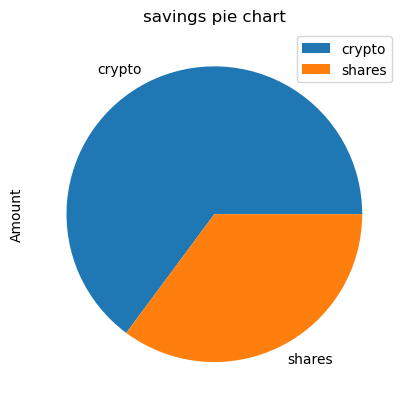

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount", title="savings pie chart",)

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
def savings_health(emergency_fund):
    while True:
        total_savings = df_savings['Amount'].sum()

        if total_savings >= emergency_fund:
            print(f"Congratulations! You have enough money in this fund: ${total_savings:0.2f}")
            break

        elif total_savings == emergency_fund:
            print(f"Congratulations! You have reached your financial goal: ${total_savings:0.2f}")
            break

        else:
            difference = emergency_fund - total_savings
            print(f"You are making progress! Your total savings are: ${total_savings:0.2f}")
            print(f"You need {difference} more to reach your financial goal.")



# Validate saving health
savings_health(emergency_fund)

Congratulations! You have enough money in this fund: $100171.79


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2019-01-05', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2024-01-05', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
historical_data = api.get_bars(tickers, timeframe, start=start_date, end=end_date).df

# Clean up data(Drop null values if any)
historical_data.dropna(inplace=True)

# Reorganize the DataFrame
reorganize_historical  = historical_data[['open', 'high', 'low','close', 'volume', 'symbol']]

# Separate ticker data
historical_agg = reorganize_historical[reorganize_historical["symbol"] == "AGG"]
historical_spy = reorganize_historical[reorganize_historical["symbol"] == "SPY"]

# Concatenate the ticker DataFrames
combined_historical_data = pd.concat([historical_agg,historical_spy], axis=1, keys=["AGG", "SPY"] )


# Display sample data
combined_historical_data.head()

AGG                                            \
                             open    high       low   close   volume symbol   
timestamp                                                                     
2019-01-07 05:00:00+00:00  106.72  106.79  106.4600  106.51  7636381    AGG   
2019-01-08 05:00:00+00:00  106.40  106.53  106.3800  106.43  4568187    AGG   
2019-01-09 05:00:00+00:00  106.42  106.57  106.4001  106.52  5639325    AGG   
2019-01-10 05:00:00+00:00  106.52  106.56  106.3300  106.40  3594944    AGG   
2019-01-11 05:00:00+00:00  106.58  106.66  106.5000  106.55  5831796    AGG   

                              SPY                                              
                             open      high     low   close     volume symbol  
timestamp                                                                      
2019-01-07 05:00:00+00:00  252.69  255.9500  251.69  254.29  105208591    SPY  
2019-01-08 05:00:00+00:00  256.82  257.3100  254.00  256.62  103624383    SPY  
2019-01-09 05:00:00+00:00  257.56  258.9100  256.19  257.92   96652953    SPY  
2019-01-10 05:00:00+00:00  256.26  259.1600  255.50  258.98   98370502    SPY  
2019-01-11 05:00:00+00:00  257.68  259.0098  257.03  258.81   73870479    SPY

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_thirty_years = MCSimulation(
    portfolio_data = combined_historical_data,
    weights=[.40,.60],
    num_simulation=500,
    num_trading_days=252*30,
)

In [17]:
# Printing the simulation input data
mc_thirty_years.portfolio_data.head()

AGG                                            \
                             open    high       low   close   volume symbol   
timestamp                                                                     
2019-01-07 05:00:00+00:00  106.72  106.79  106.4600  106.51  7636381    AGG   
2019-01-08 05:00:00+00:00  106.40  106.53  106.3800  106.43  4568187    AGG   
2019-01-09 05:00:00+00:00  106.42  106.57  106.4001  106.52  5639325    AGG   
2019-01-10 05:00:00+00:00  106.52  106.56  106.3300  106.40  3594944    AGG   
2019-01-11 05:00:00+00:00  106.58  106.66  106.5000  106.55  5831796    AGG   

                                           SPY                            \
                          daily_return    open      high     low   close   
timestamp                                                                  
2019-01-07 05:00:00+00:00          NaN  252.69  255.9500  251.69  254.29   
2019-01-08 05:00:00+00:00    -0.000751  256.82  257.3100  254.00  256.62   
2019-01-09 05:00:00+00:00     0.000846  257.56  258.9100  256.19  257.92   
2019-01-10 05:00:00+00:00    -0.001127  256.26  259.1600  255.50  258.98   
2019-01-11 05:00:00+00:00     0.001410  257.68  259.0098  257.03  258.81   

                                                          
                              volume symbol daily_return  
timestamp                                                 
2019-01-07 05:00:00+00:00  105208591    SPY          NaN  
2019-01-08 05:00:00+00:00  103624383    SPY     0.009163  
2019-01-09 05:00:00+00:00   96652953    SPY     0.005066  
2019-01-10 05:00:00+00:00   98370502    SPY     0.004110  
2019-01-11 05:00:00+00:00   73870479    SPY    -0.000656

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_thirty_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3          4          5    \
0      1.000000  1.000000  1.000000  1.000000   1.000000   1.000000   
1      0.996814  1.002379  0.997389  1.011887   0.995383   0.995207   
2      1.002218  1.008792  0.981647  1.012000   1.003670   0.988541   
3      0.995740  1.018408  0.992284  1.006835   1.006352   0.998918   
4      1.000328  1.012892  0.985661  1.006881   1.013654   1.004287   
...         ...       ...       ...       ...        ...        ...   
7556  11.994134  2.373492  5.723650  5.542128  25.861588  18.807368   
7557  11.999592  2.333426  5.729294  5.536999  25.419307  19.052985   
7558  12.004196  2.321494  5.664444  5.571347  25.488943  19.037060   
7559  12.098047  2.302588  5.677062  5.629849  25.678820  19.137275   
7560  12.112406  2.325778  5.630443  5.656849  25.634229  19.197963   

            6          7          8          9    ...       490       491  \
0      1.000000   1.000000   1.000000   1.000000  ...  1.000000  1.000000   
1      1.000180   1.009165   0.999134   0.988415  ...  1.000839  0.997851   
2      0.995246   1.006836   0.995462   0.988833  ...  0.991816  0.996860   
3      0.983756   0.990820   1.000056   0.989830  ...  0.995263  0.990195   
4      0.980592   0.986465   0.998887   0.998773  ...  0.986807  0.990785   
...         ...        ...        ...        ...  ...       ...       ...   
7556  11.183238  10.381511  21.056947  22.463726  ...  5.446553  4.900281   
7557  10.987809  10.286747  20.778079  22.537474  ...  5.445955  4.944868   
7558  10.788636  10.238956  20.994077  22.412629  ...  5.404812  4.956203   
7559  10.800061  10.147615  21.154966  22.205862  ...  5.347601  4.955862   
7560  10.736183  10.188420  21.259677  22.231746  ...  5.308395  5.028619   

           492       493       494       495       496       497        498  \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   1.000000   
1     0.997918  0.992664  1.015956  1.005128  1.012589  1.001818   1.002237   
2     0.993019  0.995035  1.027027  0.994234  1.017541  1.001233   1.013174   
3     0.990371  1.007954  1.032956  0.992785  1.024911  0.996086   1.010630   
4     0.992357  1.019646  1.033165  0.999887  1.018823  0.986281   1.013108   
...        ...       ...       ...       ...       ...       ...        ...   
7556  6.207438  6.244746  3.049814  8.684642  4.510360  4.852372  12.503749   
7557  6.200263  6.250925  3.062196  8.798326  4.472075  4.867290  12.552715   
7558  6.137576  6.200198  3.045257  8.792864  4.486728  4.799421  12.604589   
7559  6.197592  6.207854  3.060380  8.813649  4.520469  4.832107  12.432619   
7560  6.224542  6.184426  3.059843  8.714028  4.562670  4.835634  12.352777   

           499  
0     1.000000  
1     1.001863  
2     0.988777  
3     1.004555  
4     1.001870  
...        ...  
7556  8.906296  
7557  8.811927  
7558  8.695599  
7559  8.672486  
7560  8.711651  

[7561 rows x 500 columns]

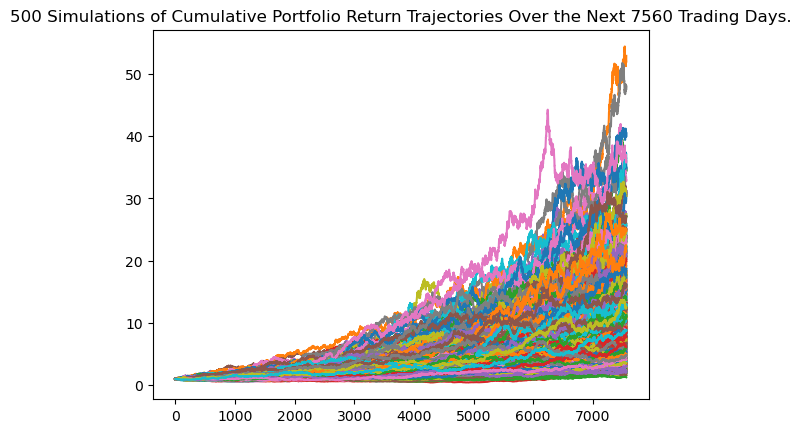

In [19]:
# Plot simulation outcomes
sim_plot_thirty = mc_thirty_years.plot_simulation()

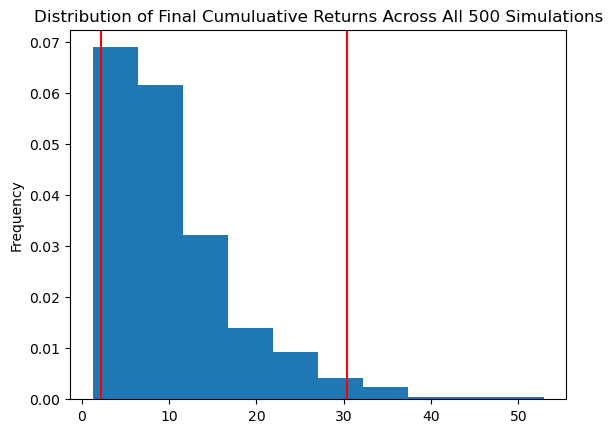

In [20]:
# Plot probability distribution and confidence intervals
dist_plot_thirty = mc_thirty_years.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics = mc_thirty_years.summarize_cumulative_return()

# Print summary statistics
print(summary_statistics)

count           500.000000
mean             10.422963
std               7.504530
min               1.273062
25%               5.334460
50%               7.931757
75%              13.282488
max              52.899905
95% CI Lower      2.175350
95% CI Upper     30.365195
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_statistics[8]*initial_investment,2)
ci_upper = round(summary_statistics[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $43507.0 and $607303.91


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_statistics[8]*initial_investment,2)
ci_upper = round(summary_statistics[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $65260.51 and $910955.86


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mc_five_years = MCSimulation(
    portfolio_data = combined_historical_data,
    weights=[.40,.60],
    num_simulation=500,
    num_trading_days=252*5,
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_five_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.988902  0.995580  1.000271  0.995017  0.999107  0.990256  1.002596   
2     0.974937  0.989124  1.001152  0.986180  0.992232  0.988106  1.000228   
3     0.977459  0.993925  0.999529  0.987531  1.001076  0.991201  0.986667   
4     0.974976  0.996157  0.996653  0.986693  1.014417  0.990132  0.992745   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.630166  1.838677  1.558338  1.299195  1.469358  1.841322  1.309049   
1257  1.634132  1.866788  1.572716  1.313089  1.456178  1.843076  1.320557   
1258  1.626155  1.854143  1.580597  1.307306  1.454564  1.829034  1.329228   
1259  1.624006  1.841884  1.568997  1.293910  1.453175  1.842766  1.344358   
1260  1.626091  1.857164  1.576260  1.289877  1.454391  1.864750  1.350537   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.993481  0.998866  1.007432  ...  0.991550  1.009240  0.999948   
2     0.994840  1.003834  1.010313  ...  1.000284  1.010048  1.011019   
3     0.990971  1.004604  1.014458  ...  1.002912  1.007644  1.004320   
4     0.985762  1.024328  1.010779  ...  1.008968  1.008385  1.014516   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.362107  1.859570  1.616423  ...  1.016831  1.367071  1.417028   
1257  1.355326  1.862526  1.614827  ...  1.024442  1.354590  1.404584   
1258  1.341224  1.849794  1.610675  ...  1.014962  1.363594  1.417142   
1259  1.347886  1.846138  1.615787  ...  1.015440  1.369507  1.417827   
1260  1.337491  1.847733  1.609115  ...  1.032462  1.366072  1.397275   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.002521  0.986593  0.997179  0.997939  0.990642  1.012258  0.996145  
2     0.994658  0.977332  0.992006  0.998515  1.004519  1.022147  1.010782  
3     0.994615  0.977687  0.993019  0.998195  1.028873  1.038945  1.022626  
4     0.995688  0.965537  0.987215  1.000442  1.036048  1.030808  1.024638  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.686079  2.418033  1.520363  1.207952  1.706945  1.894284  1.881701  
1257  1.689958  2.402364  1.516418  1.199279  1.706014  1.902382  1.873519  
1258  1.703802  2.379899  1.529150  1.200735  1.699264  1.890557  1.873533  
1259  1.730187  2.433785  1.540095  1.208304  1.702320  1.908471  1.880746  
1260  1.734029  2.404477  1.551917  1.210609  1.683935  1.883323  1.900531  

[1261 rows x 500 columns]

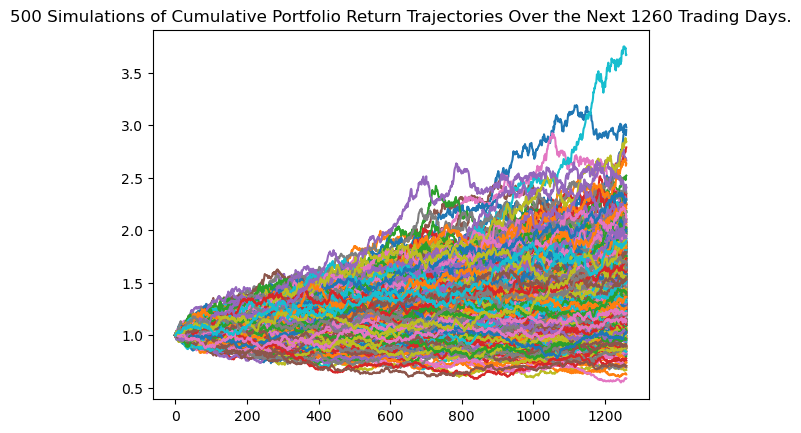

In [26]:
# Plot simulation outcomes
sim_plot_five = mc_five_years.plot_simulation()

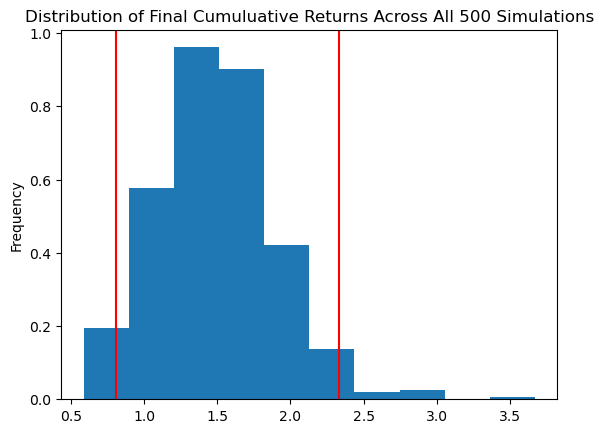

In [27]:
# Plot probability distribution and confidence intervals
dist_plot_five = mc_five_years.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics_five = mc_five_years.summarize_cumulative_return()

# Print summary statistics
print(summary_statistics_five)

count           500.000000
mean              1.496473
std               0.404619
min               0.589382
25%               1.223409
50%               1.473034
75%               1.733647
max               3.668831
95% CI Lower      0.805146
95% CI Upper      2.328583
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_statistics_five[8]*initial_investment,2)
ci_upper_five = round(summary_statistics_five[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $48308.76 and $139715.0


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_ten_years = MCSimulation(
    portfolio_data = combined_historical_data,
    weights=[.40,.60],
    num_simulation=500,
    num_trading_days=252*10,
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_ten_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.002829  1.004199  1.008541  0.994957  0.994239  0.993723  0.992653   
2     1.004610  1.010115  1.018843  1.007548  1.004215  0.996524  0.994739   
3     1.012296  1.007777  1.014256  1.013203  0.997280  1.007862  0.983519   
4     1.004442  1.014072  0.997428  1.006766  0.984177  1.024603  0.990107   
...        ...       ...       ...       ...       ...       ...       ...   
2516  1.415699  2.287618  1.907921  4.172924  2.571776  2.109803  2.985311   
2517  1.417571  2.288849  1.897923  4.188793  2.588147  2.109370  2.998508   
2518  1.425271  2.307508  1.892681  4.192030  2.605158  2.101369  3.007454   
2519  1.439173  2.341773  1.899950  4.210057  2.659058  2.116106  3.004718   
2520  1.440929  2.362180  1.917936  4.174331  2.629906  2.153137  3.017760   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.003448  0.993891  1.002615  ...  1.006583  0.981431  1.012644   
2     1.010337  1.001187  0.994535  ...  1.005977  0.983077  0.996440   
3     1.003436  1.005813  0.990142  ...  1.004123  0.981575  1.005199   
4     1.000846  1.011578  0.989329  ...  1.021267  0.969175  0.994918   
...        ...       ...       ...  ...       ...       ...       ...   
2516  1.382823  1.930946  2.370806  ...  1.253794  1.348765  2.037686   
2517  1.382813  1.939881  2.386400  ...  1.253856  1.347523  2.032715   
2518  1.397994  1.949880  2.384968  ...  1.249406  1.339718  2.052534   
2519  1.392677  1.937099  2.386370  ...  1.252859  1.343045  2.069646   
2520  1.389169  1.946863  2.376247  ...  1.225220  1.334800  2.063541   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.998387  0.991574  0.992812  0.992286  0.999299  0.995552  0.994639  
2     1.006941  1.003634  0.986847  0.984288  0.998620  0.999775  0.985063  
3     1.001861  1.004085  0.982173  0.981815  1.008056  1.002951  0.982218  
4     1.003792  1.010442  0.982139  0.994273  0.994826  1.002732  0.979395  
...        ...       ...       ...       ...       ...       ...       ...  
2516  2.356154  1.473692  2.058959  1.290952  5.012303  2.598836  2.682530  
2517  2.388473  1.460926  2.069342  1.298844  4.990452  2.642521  2.662694  
2518  2.351946  1.479432  2.079893  1.316068  4.960244  2.657785  2.669217  
2519  2.359595  1.488039  2.077362  1.303531  4.987592  2.645767  2.651388  
2520  2.350147  1.491627  2.065290  1.321482  4.989675  2.635054  2.625019  

[2521 rows x 500 columns]

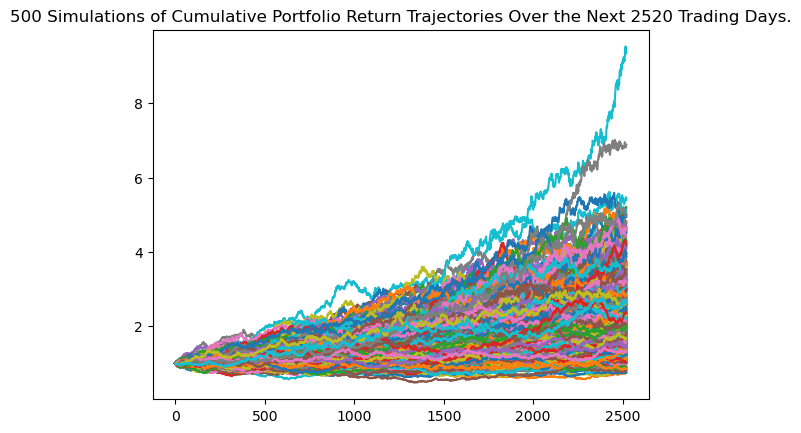

In [32]:
# Plot simulation outcomes
sim_plot_ten = mc_ten_years.plot_simulation()

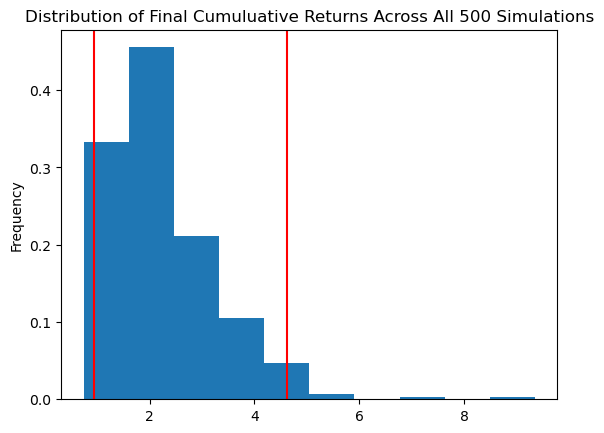

In [33]:
# Plot probability distribution and confidence intervals
dist_plot_ten = mc_ten_years.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics_ten = mc_ten_years.summarize_cumulative_return()

# Print summary statistics
print(summary_statistics_ten)

count           500.000000
mean              2.253999
std               1.003356
min               0.744907
25%               1.530618
50%               2.020118
75%               2.748253
max               9.353917
95% CI Lower      0.941280
95% CI Upper      4.620715
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_statistics_ten[8]*initial_investment,2)
ci_upper_ten = round(summary_statistics_ten[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $56476.8 and $277242.91


In [39]:
print("""
My Analysis: The portfolio has shown positive growth 95 percent of the time!
With an initial investment of $12,000 over the long run (30 years) and also with a higher initial investment of $60,000
over 10 years.

My Advice: I would advice the client to invest thier savings.

Thank You!
""")
     


My Analysis: The portfolio has shown positive growth 95 percent of the time!
With an initial investment of $12,000 over the long run (30 years) and also with a higher initial investment of $60,000
over 10 years.

My Advice: I would advice the client to invest thier savings.

Thank You!

